In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from database_operations import DatabaseOperations
from overtake_model import OvertakingModel
from race_data import RaceDataSetup
from race_dataframe import RaceDataframe
from race_sim import RaceSimulator
from evaluation import RaceSimEvaluation
from optimisation import Optimisation

import time
from joblib import Parallel, delayed

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) 

## Mexico GP

In [2]:
# Initialise all classes
database_ops_mexico = DatabaseOperations(2024, "Mexico City")
race_df_mexico = RaceDataframe(database_ops_mexico)
race_data_mexico = RaceDataSetup(database_ops_mexico, race_df_mexico)
overtake_model_mexico = OvertakingModel(race_df_mexico.race_df)
simulation_mexico = RaceSimulator(race_data_mexico, overtake_model_mexico)

driver = 44
optimise_mexico_44 = Optimisation(race_data_mexico, overtake_model_mexico, driver)
driver = 63
optimise_mexico_63 = Optimisation(race_data_mexico, overtake_model_mexico, driver)

In [3]:
simulation_mexico.simulate()
simulation_mexico.get_results_as_dataframe()

,driver_number,driver_name,pit_schedule,tyre_type,lap_num,sector,sector_time,stint_lap,cumulative_time,gap,pit,pace,position,starting_pos,base_sector_times,tyre_diff,stint_laps_diff,drs_available,retired,overtakes,predicted_overtake
0,55,Carlos Sainz,"{33: 3, 1: 2}",3,71,3,20.659784,39,6263.274114,0.000000,False,31.549575,1,1,"{1: 27.037, 2: 29.296, 3: 19.533}",0,1,False,False,6,False
1,4,Lando Norris,"{31: 3, 1: 2}",3,71,3,20.703931,41,6265.449308,2.175194,False,20.770952,2,2,"{1: 27.204, 2: 29.191, 3: 19.67}",0,-2,False,False,1,False
2,16,Charles Leclerc,"{32: 3, 70: 1, 1: 2}",1,71,3,22.274851,2,6288.469647,23.020339,False,21.660755,3,3,"{1: 27.069, 2: 29.429, 3: 19.693}",2,39,False,False,7,False
3,44,Lewis Hamilton,"{29: 3, 1: 2}",3,71,3,20.863479,43,6299.578047,11.108400,False,20.932355,4,4,"{1: 27.295, 2: 29.546, 3: 19.688}",-2,-41,False,False,6,False
4,81,Oscar Piastri,"{40: 3, 1: 2}",3,71,3,20.743427,32,6310.674003,11.095956,False,20.795339,5,8,"{1: 27.376, 2: 29.546, 3: 20.006}",0,11,False,False,7,False
5,63,George Russell,"{32: 3, 1: 2}",3,71,3,20.987247,40,6311.681661,1.007658,False,21.022026,6,5,"{1: 27.361, 2: 29.263, 3: 19.624}",0,-8,False,False,3,False
6,1,Max Verstappen,"{27: 3, 1: 2}",3,71,3,20.817306,45,6317.422278,5.740616,False,20.890183,7,6,"{1: 27.222, 2: 29.318, 3: 19.631}",0,-5,False,False,2,False
7,20,Kevin Magnussen,"{31: 3, 1: 2}",3,71,3,21.040058,41,6327.308067,9.885789,False,21.082077,8,7,"{1: 27.272, 2: 29.624, 3: 19.854}",0,4,False,False,7,False
8,27,Nico Hulkenberg,"{30: 3, 1: 2}",3,71,3,20.856500,42,6343.899743,16.591676,False,20.935128,9,9,"{1: 27.382, 2: 29.592, 3: 19.841}",0,-1,False,False,4,False
9,10,Pierre Gasly,"{29: 3, 1: 2}",3,71,3,21.015713,43,6363.300474,19.400731,False,21.082269,10,10,"{1: 27.418, 2: 29.585, 3: 19.847}",0,-1,False,False,2,False


In [4]:
evaluation_mexico = RaceSimEvaluation(simulation_mexico, race_df_mexico)
evaluation_mexico.comparison_df

,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Carlos Sainz,71,1,1.0,0.0,6,0,6,6263.274114,6054.508714,208.7654,0.0,0.0,0.0
1,Lando Norris,71,2,2.0,0.0,1,2,-1,6265.449308,6058.727243,206.722065,2.175194,4.218529,-2.043334
2,Charles Leclerc,71,3,3.0,0.0,7,1,6,6288.469647,6088.265186,200.204462,25.195533,33.756471,-8.560938
3,Lewis Hamilton,71,4,4.0,0.0,6,2,4,6299.578047,6098.342071,201.235976,36.303933,43.833357,-7.529424
4,Oscar Piastri,71,5,8.0,-3.0,7,4,3,6310.674003,6115.130114,195.543889,47.399889,60.6214,-13.221511
5,George Russell,71,6,5.0,1.0,3,2,1,6311.681661,6102.109700,209.571961,48.407547,47.600986,0.806562
6,Max Verstappen,71,7,6.0,1.0,2,4,-2,6317.422278,6114.701529,202.720749,54.148164,60.192814,-6.044651
7,Kevin Magnussen,71,8,7.0,1.0,7,1,6,6327.308067,6116.996357,210.31171,64.033953,62.487643,1.54631
8,Nico Hulkenberg,70,9,9.0,0.0,4,2,2,6343.899743,6055.841275,288.058468,80.625629,81.917561,-1.291932
9,Pierre Gasly,70,10,10.0,0.0,2,3,-1,6363.300474,6054.883460,308.417015,100.02636,80.959745,19.066615


In [5]:
print(evaluation_mexico.comparison_df["overtakes_actual"].sum())
print(evaluation_mexico.comparison_df["overtakes_sim"].sum())

66
84


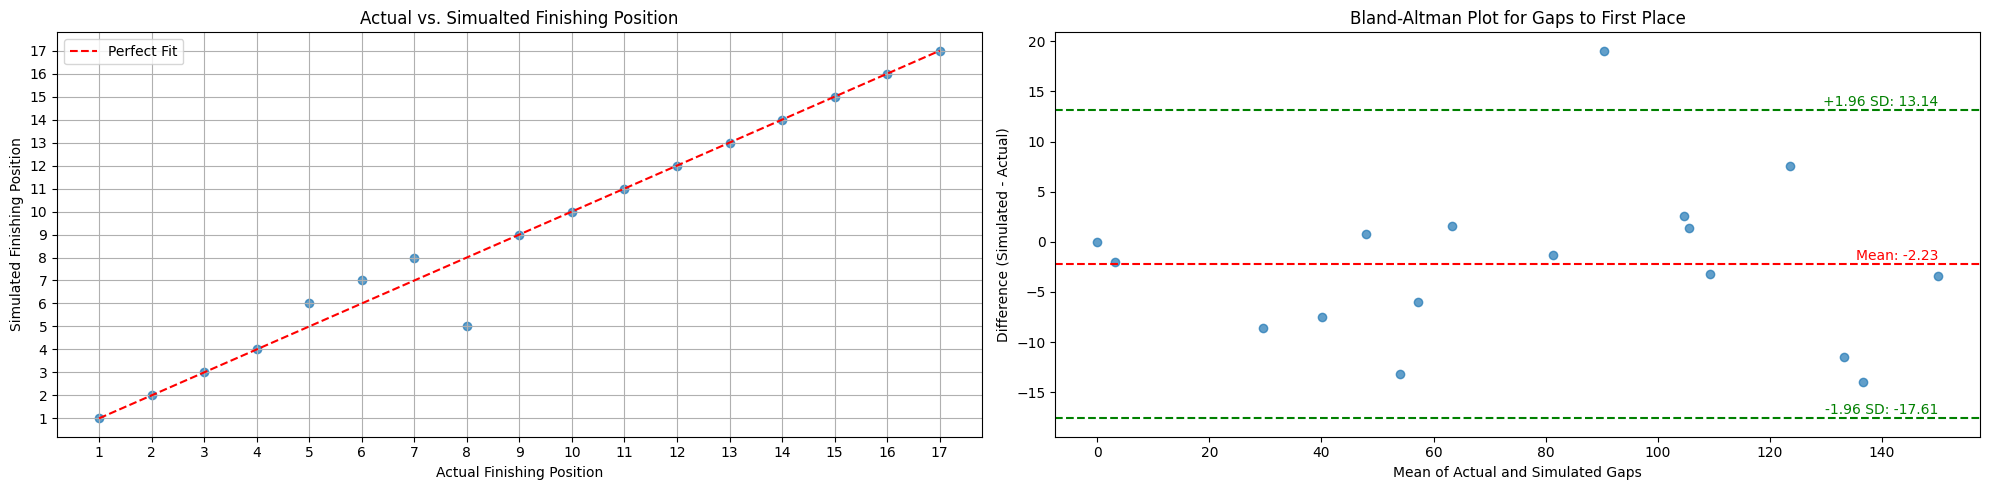

In [6]:
evaluation_mexico.plot_evaluation_results()

In [7]:
evaluation_mexico.calculate_general_errors()

{'total_absolute_position_error': 6.0,
 'position_mae': np.float64(0.35294117647058826),
 'total_absolute_overtake_error': np.int64(58),
 'overtake_mae': np.float64(3.411764705882353),
 'cumulative_time_mae': np.float64(249.1944472117113),
 'gap_mae': np.float64(6.104479958412573)}

In [8]:
evaluation_mexico.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.38970588235294124),
  'p_value': np.float64(0.12203439858782986)},
 'gaps_to_leader': {'correlation': np.float64(0.9901960784313727),
  'p_value': np.float64(3.07362545045533e-14)}}

In [9]:
evaluation_mexico.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(76.5),
  'p_value': np.float64(1.52587890625e-05)},
 'gaps_to_leader': {'statistic': np.float64(41.0),
  'expected_value': np.float64(68.0),
  'p_value': np.float64(0.16267331507194682)}}

In [10]:
def run_optimisation(optimise, max_iterations, population_size, generations):
	start_time_bayesian = time.perf_counter()
	strategies_bayesian = optimise.bayesian_optimisation(max_iterations=max_iterations)
	runtime_bayesian = time.perf_counter() - start_time_bayesian
	
	start_time_genetic = time.perf_counter()
	strategies_genetic = optimise.genetic_algorithm_optimisation(population_size=population_size, generations=generations)
	runtime_genetic = time.perf_counter() - start_time_genetic
	
	actual_strategy = optimise.get_actual_strategy()

	return strategies_bayesian, runtime_bayesian, strategies_genetic, runtime_genetic, actual_strategy

In [11]:
def print_results(race_name, optimisation_results):
    # Unpack the optimisation results
    strategies_bayesian, runtime_bayesian, strategies_genetic, runtime_genetic, actual_strategy_data = optimisation_results

    # Print the results
    print(f"=== {race_name} Results ===")
    print(f"Bayesian Optimization Runtime: {runtime_bayesian:.2f} seconds")
    print("Top 10 Bayesian Optimization Strategies:")
    for i, strategy in enumerate(strategies_bayesian[:10], start=1):
        print(f"  {i}. Strategy: {strategy['strategy']}, Final Position: {strategy['position']}")

    print(f"\nGenetic Algorithm Runtime: {runtime_genetic:.2f} seconds")
    print("Top 10 Genetic Algorithm Strategies:")
    for i, strategy in enumerate(strategies_genetic[:10], start=1):
        print(f"  {i}. Strategy: {strategy['strategy']}, Final Position: {strategy['final_position']}")

    print("\nActual Strategy:")
    print(f"  Strategy: {actual_strategy_data['actual_strat']}")
    print(f"  Actual Finishing Position: {actual_strategy_data['actual_finishing_pos']}")
    print(f"  Simulated Finishing Position: {actual_strategy_data['simualted_finishing_pos']}")

    print("=" * 40)

In [12]:
optimisation_params = (10, 5, 1)
mexico_opt_44 = run_optimisation(optimise_mexico_44, *optimisation_params)
mexico_opt_63 = run_optimisation(optimise_mexico_63, *optimisation_params)

|   iter    |  target   | num_pi... | pit1_lap  | pit1_tyre | pit2_lap  | pit2_tyre | pit3_lap  | pit3_tyre | start_... |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -15.0     | 1.749     | 66.65     | 2.464     | 42.71     | 1.312     | 12.61     | 1.116     | 2.732     |
| 2         | -17.0     | 2.202     | 50.15     | 1.041     | 67.95     | 2.665     | 16.44     | 1.364     | 1.367     |
| 3         | -20.0     | 1.608     | 37.68     | 1.864     | 21.8      | 2.224     | 11.49     | 1.584     | 1.733     |
| 4         | -20.0     | 1.912     | 55.39     | 1.399     | 36.97     | 2.185     | 5.159     | 2.215     | 1.341     |
| 5         | -7.0      | 1.13      | 66.52     | 2.931     | 56.97     | 1.609     | 8.642     | 2.368     | 1.88      |
| 6         | -17.0     | 1.76      | 67.15     | 1.128     | 54.61     | 1.619     | 4.656     | 2.485     | 1.662     |
| 7         | -7.0      

/home/ben/Individual_Project/env/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ben/Individual_Project/env/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg 	min	max
0  	5     	12.2	8  	17 
1  	3     	12  	8  	17 


In [13]:
print_results("Mexico GP", mexico_opt_44)

=== Mexico GP Results ===
Bayesian Optimization Runtime: 8.86 seconds
Top 10 Bayesian Optimization Strategies:
  1. Strategy: {1: np.int64(2), 32: np.int64(2), 45: np.int64(3)}, Final Position: 6.0
  2. Strategy: {1: np.int64(2), 8: np.int64(3)}, Final Position: 7.0
  3. Strategy: {1: 1, 7: np.int64(3), 38: np.int64(3)}, Final Position: 7.0
  4. Strategy: {1: np.int64(2), 37: 1, 47: np.int64(2)}, Final Position: 11.0
  5. Strategy: {1: np.int64(3), 12: np.int64(2)}, Final Position: 15.0
  6. Strategy: {1: 1, 16: 1, 50: np.int64(3)}, Final Position: 17.0
  7. Strategy: {1: np.int64(2), 4: 1}, Final Position: 17.0
  8. Strategy: {1: np.int64(3), 3: np.int64(2)}, Final Position: 17.0
  9. Strategy: {1: np.int64(2), 32: 1, 42: 1}, Final Position: 17.0
  10. Strategy: {1: np.int64(3), 3: 1, 10: np.int64(2)}, Final Position: 17.0

Genetic Algorithm Runtime: 9.83 seconds
Top 10 Genetic Algorithm Strategies:
  1. Strategy: {1: np.int64(3), 9: np.int64(2), 49: np.int64(2), 41: np.int64(2)}, Fin

In [14]:
print_results("Mexico GP", mexico_opt_63)

=== Mexico GP Results ===
Bayesian Optimization Runtime: 8.76 seconds
Top 10 Bayesian Optimization Strategies:
  1. Strategy: {1: np.int64(2), 32: np.int64(2), 45: np.int64(3)}, Final Position: 6.0
  2. Strategy: {1: np.int64(3), 12: np.int64(2)}, Final Position: 7.0
  3. Strategy: {1: np.int64(2), 8: np.int64(3)}, Final Position: 9.0
  4. Strategy: {1: np.int64(2), 37: 1, 47: np.int64(2)}, Final Position: 9.0
  5. Strategy: {1: np.int64(3), 3: 1, 10: np.int64(2)}, Final Position: 11.0
  6. Strategy: {1: 1, 11: np.int64(3)}, Final Position: 13.0
  7. Strategy: {1: np.int64(2), 3: np.int64(3)}, Final Position: 16.0
  8. Strategy: {1: 1, 16: 1, 50: np.int64(3)}, Final Position: 17.0
  9. Strategy: {1: 1, 15: np.int64(3)}, Final Position: 17.0
  10. Strategy: {1: np.int64(2), 32: 1, 42: 1}, Final Position: 17.0

Genetic Algorithm Runtime: 10.36 seconds
Top 10 Genetic Algorithm Strategies:
  1. Strategy: {1: np.int64(2), 26: np.int64(2), 61: np.int64(2), 7: np.int64(3)}, Final Position: 8
